In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/24_Problemsolver_TP.csv', encoding='cp949')

In [ ]:
data_cleaned = data.dropna() # Nan값 (결측치) 제거

In [ ]:
data_cleaned #결측치 제거 확인

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0


In [ ]:
data_cleaned = data_cleaned[(data_cleaned['미세먼지 농도'] >= 0) & (data_cleaned['미세먼지 농도'] <= 500)]
data_cleaned = data_cleaned[(data_cleaned['이산화질소'] >= 0) & (data_cleaned['이산화질소'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['아황산가스'] >= 0) & (data_cleaned['아황산가스'] <= 1000)]
data_cleaned = data_cleaned[(data_cleaned['일산화질소'] >= 0) & (data_cleaned['일산화질소'] <= 1000)]

In [ ]:
from datetime import datetime
data_cleaned['year'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
data_cleaned['month'] = data_cleaned['일자'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
data_cleaned['month'] = data_cleaned['month'].astype(str).str.zfill(2)

In [ ]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,합계 일조시간(hr),평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,0.3,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,09
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,0.2,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,09
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,0.1,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,09
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,0.1,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,0.0,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,6.1,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,6.0,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,6.0,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,6.0,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12


In [ ]:
data_cleaned['time'] = data_cleaned['year'].astype(str)+ data_cleaned['month'].astype(str)

In [ ]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균지면온도,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,time
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,...,22.9,1.1,2.5,230.0,4.3,270.0,23.0,2019,09,201909
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,...,19.4,1.3,3.9,140.0,6.8,160.0,19.0,2019,09,201909
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,...,17.7,1.9,4.6,90.0,10.1,340.0,19.0,2019,09,201909
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,...,22.3,1.0,3.1,90.0,7.0,20.0,37.0,2019,10,201910
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,...,5.9,1.9,4.6,230.0,7.6,230.0,27.0,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,...,-2.1,1.4,3.3,290.0,7.8,230.0,29.0,2023,11,202311
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,...,-2.6,0.9,3.8,290.0,6.5,290.0,35.0,2023,12,202312
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,...,-0.7,0.6,3.2,290.0,5.6,290.0,40.0,2023,12,202312
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,...,-1.2,0.3,2.0,320.0,3.5,320.0,57.0,2023,12,202312


In [ ]:
# '지역' 값을 숫자로 매핑하기 위한 딕셔너리 생성
region_mapping = {
    '강릉시': 1,
    '동해시': 2,
    '속초시': 3,
    '영월군': 4,
    '원주시': 5,
    '인제군': 6,
    '정선군': 7,
    '철원군': 8,
    '춘천시': 9,
    '태백시': 10,
    '홍천군': 11,
}

# 'adr' 열 생성 및 '지역' 값을 숫자로 변환하여 채우기
data_cleaned['adr'] = data_cleaned['지역'].map(region_mapping)

data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,time,adr
0,강릉시,2019-09-03,23.5,10.0,1014.3,0.001,0.014,0.5,20.7,19.6,...,1.1,2.5,230.0,4.3,270.0,23.0,2019,09,201909,1
1,강릉시,2019-09-21,15.0,10.0,1018.2,0.001,0.012,0.3,17.6,15.0,...,1.3,3.9,140.0,6.8,160.0,19.0,2019,09,201909,1
2,강릉시,2019-09-22,78.5,10.0,1015.3,0.001,0.004,0.2,16.6,14.9,...,1.9,4.6,90.0,10.1,340.0,19.0,2019,09,201909,1
3,강릉시,2019-10-02,61.0,10.0,1011.9,0.001,0.012,0.3,21.2,19.7,...,1.0,3.1,90.0,7.0,20.0,37.0,2019,10,201910,1
4,강릉시,2019-12-01,0.1,10.0,1016.9,0.003,0.016,0.4,8.4,7.5,...,1.9,4.6,230.0,7.6,230.0,27.0,2019,12,201912,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,홍천군,2023-11-30,0.0,0.0,1011.1,0.002,0.014,0.3,-4.6,-7.8,...,1.4,3.3,290.0,7.8,230.0,29.0,2023,11,202311,11
18743,홍천군,2023-12-01,0.0,0.0,1009.3,0.002,0.029,0.4,-5.1,-10.3,...,0.9,3.8,290.0,6.5,290.0,35.0,2023,12,202312,11
18744,홍천군,2023-12-03,0.0,0.0,1009.7,0.003,0.024,0.5,-1.0,-5.5,...,0.6,3.2,290.0,5.6,290.0,40.0,2023,12,202312,11
18745,홍천군,2023-12-04,0.0,0.0,1006.2,0.003,0.023,0.5,-1.4,-7.4,...,0.3,2.0,320.0,3.5,320.0,57.0,2023,12,202312,11


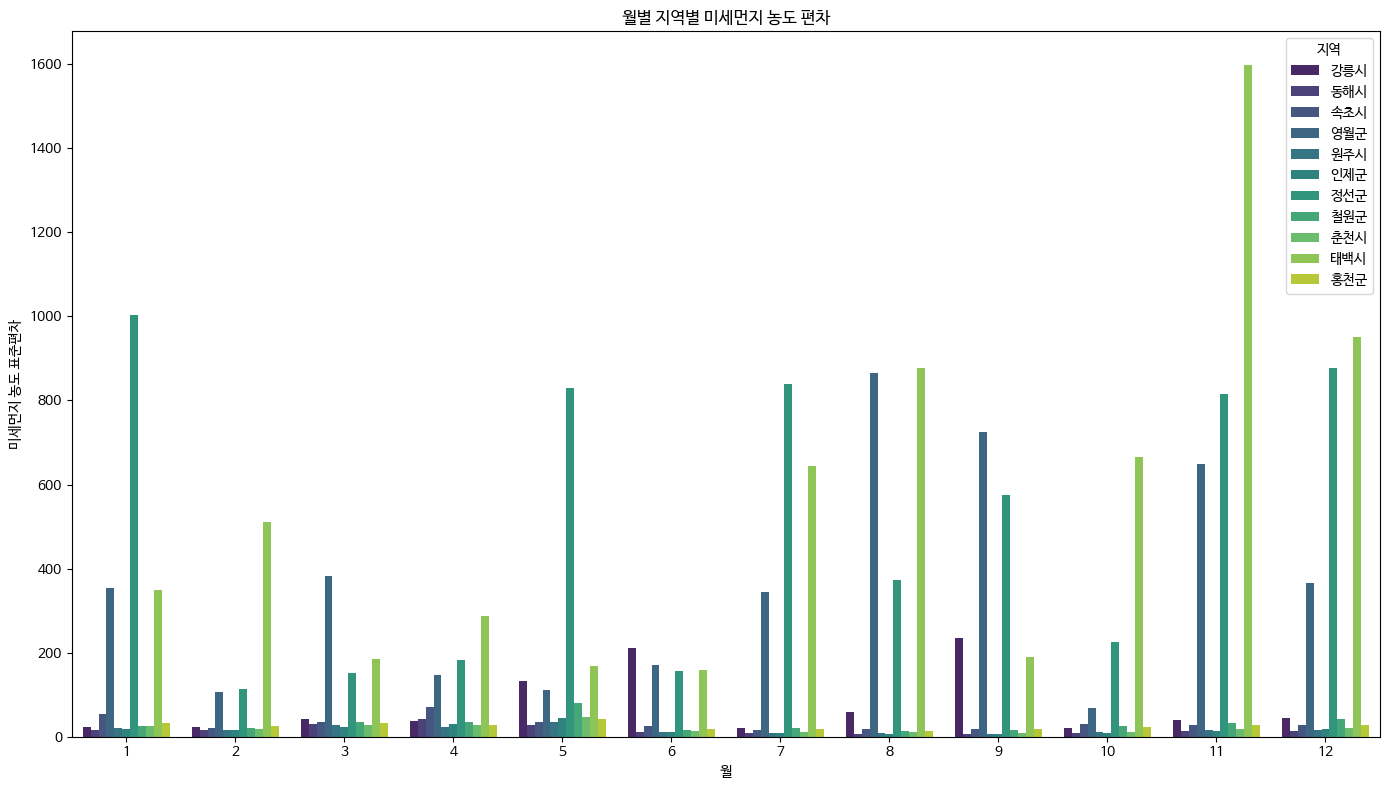

In [ ]:
# '월' 열 생성
data['월'] = pd.to_datetime(data['일자']).dt.month

# 그룹화하여 미세먼지 농도의 표준편차 계산
grouped = data.groupby(['지역', '월'])['미세먼지 농도'].std().reset_index()
grouped.rename(columns={'미세먼지 농도': '미세먼지 농도 표준편차'}, inplace=True)

# 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='월', y='미세먼지 농도 표준편차', hue='지역', data=grouped, palette='viridis')
plt.title('월별 지역별 미세먼지 농도 편차')
plt.xlabel('월')
plt.ylabel('미세먼지 농도 표준편차')
plt.legend(title='지역')
plt.tight_layout()
plt.show()


In [ ]:
data_cleaned = data_cleaned.sort_values(by=['month'], ascending=True)

In [ ]:
data_cleaned

,지역,일자,강수량,평균전운량,기압,아황산가스,이산화질소,일산화질소,평균기온,최저기온,...,평균풍속,최대풍속,최대풍속풍향,최대순간풍속,최대순간풍석풍향,미세먼지 농도,year,month,time,adr
13517,철원군,2023-01-05,0.0,3.0,1012.2,0.004,0.012,0.2,-7.7,-15.6,...,0.3,1.5,270.0,3.0,290.0,32.0,2023,01,202301,8
16752,속초시,2022-01-29,0.0,0.9,1016.1,0.002,0.008,0.3,-0.5,-4.1,...,1.7,4.1,290.0,6.7,230.0,15.0,2022,01,202201,3
16134,홍천군,2021-01-03,0.0,1.4,1016.1,0.004,0.002,0.6,-7.5,-14.1,...,1.0,4.2,270.0,9.3,290.0,49.0,2021,01,202101,11
3374,영월군,2021-01-26,2.1,8.1,990.5,2.336,1.176,259.6,2.9,0.3,...,0.4,2.2,290.0,4.0,270.0,23.0,2021,01,202101,4
10714,영월군,2022-01-17,0.0,4.5,995.6,0.001,0.006,0.3,-4.7,-11.2,...,1.7,4.0,320.0,8.2,340.0,21.0,2022,01,202201,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16415,영월군,2022-12-29,0.0,1.1,1002.0,0.003,0.009,0.4,-4.6,-12.0,...,1.0,4.0,270.0,6.8,320.0,28.0,2022,12,202212,4
8314,원주시,2019-12-23,0.7,5.8,1003.4,0.005,0.024,0.7,2.9,0.2,...,0.7,2.2,250.0,3.3,200.0,53.0,2019,12,201912,5
16423,원주시,2021-12-01,0.0,1.1,1002.1,0.003,0.008,0.3,-0.5,-2.9,...,3.1,5.7,270.0,11.8,290.0,15.0,2021,12,202112,5
16428,원주시,2022-12-25,0.0,1.1,1005.2,0.006,0.022,0.7,-7.8,-13.5,...,0.5,1.7,230.0,2.9,250.0,42.0,2022,12,202212,5


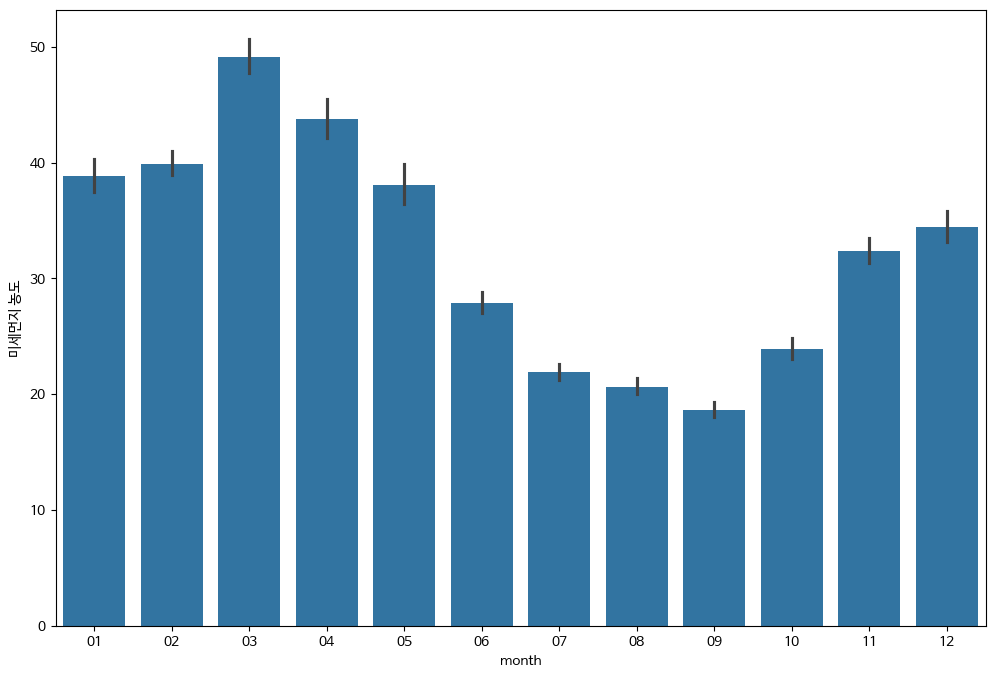

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='미세먼지 농도', data=data_cleaned)
plt.show()

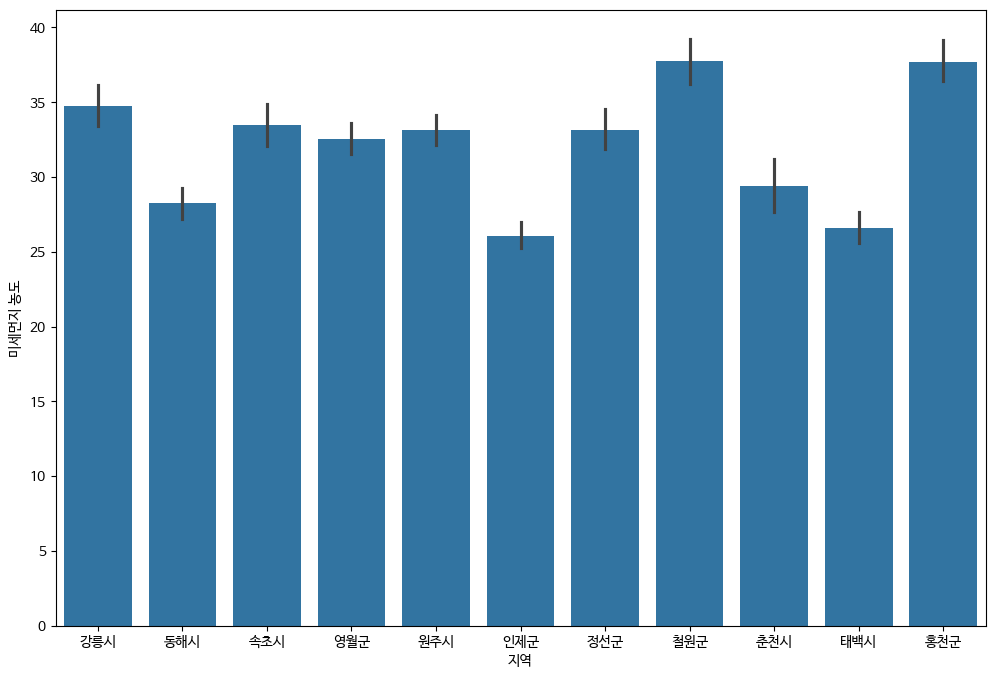

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='지역', y='미세먼지 농도', data=data_cleaned)
plt.show()

In [ ]:
data_cleaned = data_cleaned.sort_values(by=['time'], ascending=True)

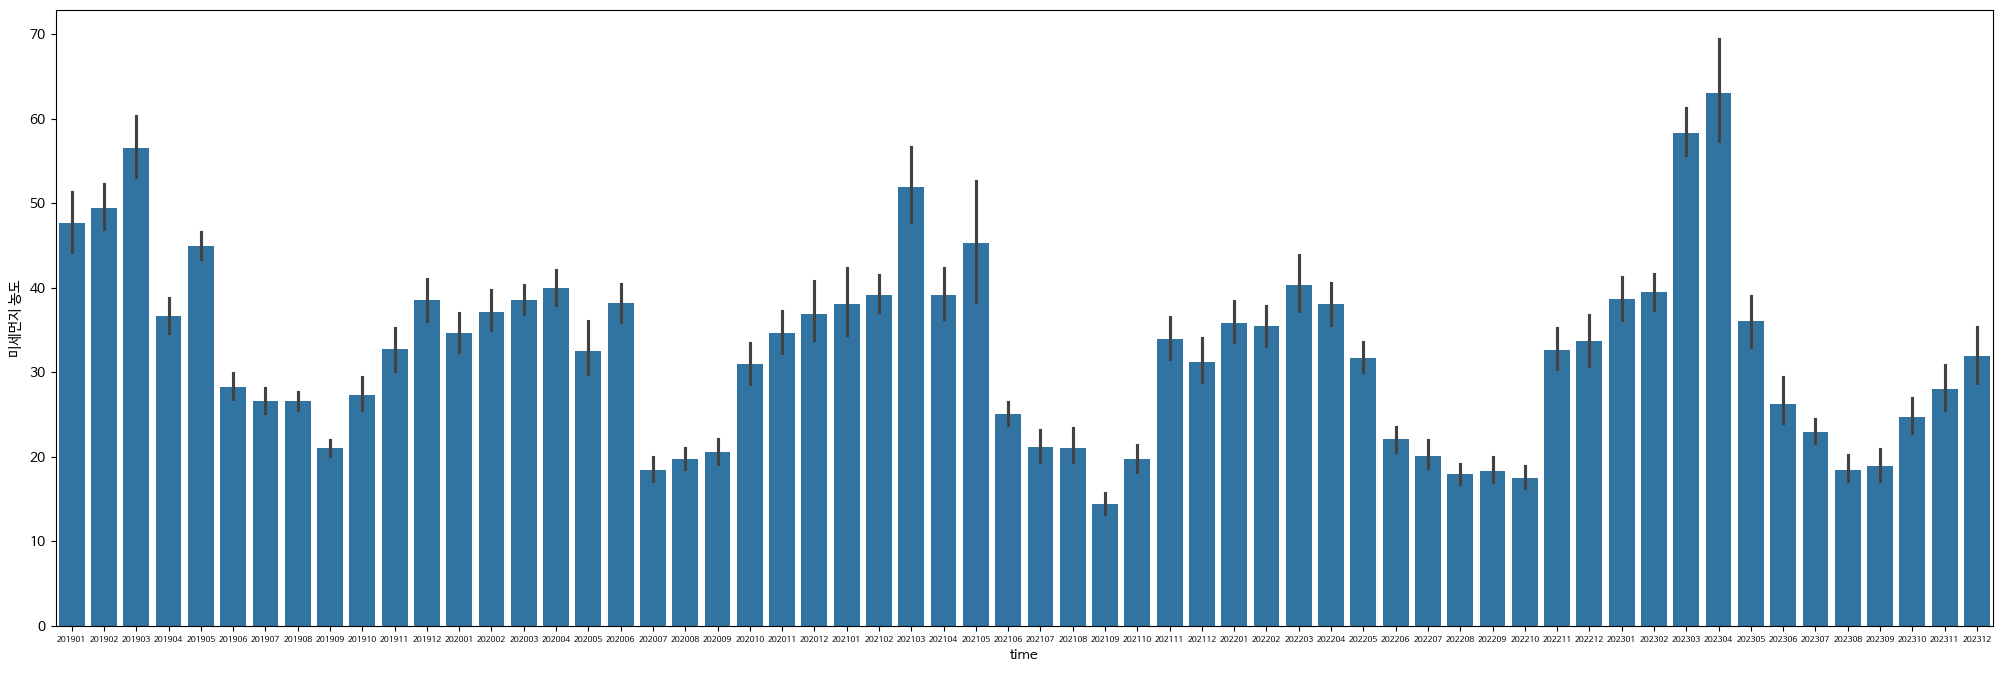

In [ ]:
plt.figure(figsize=(25, 8))
plt.xticks(fontsize=6)
sns.barplot(x='time', y='미세먼지 농도', data=data_cleaned)
plt.show()

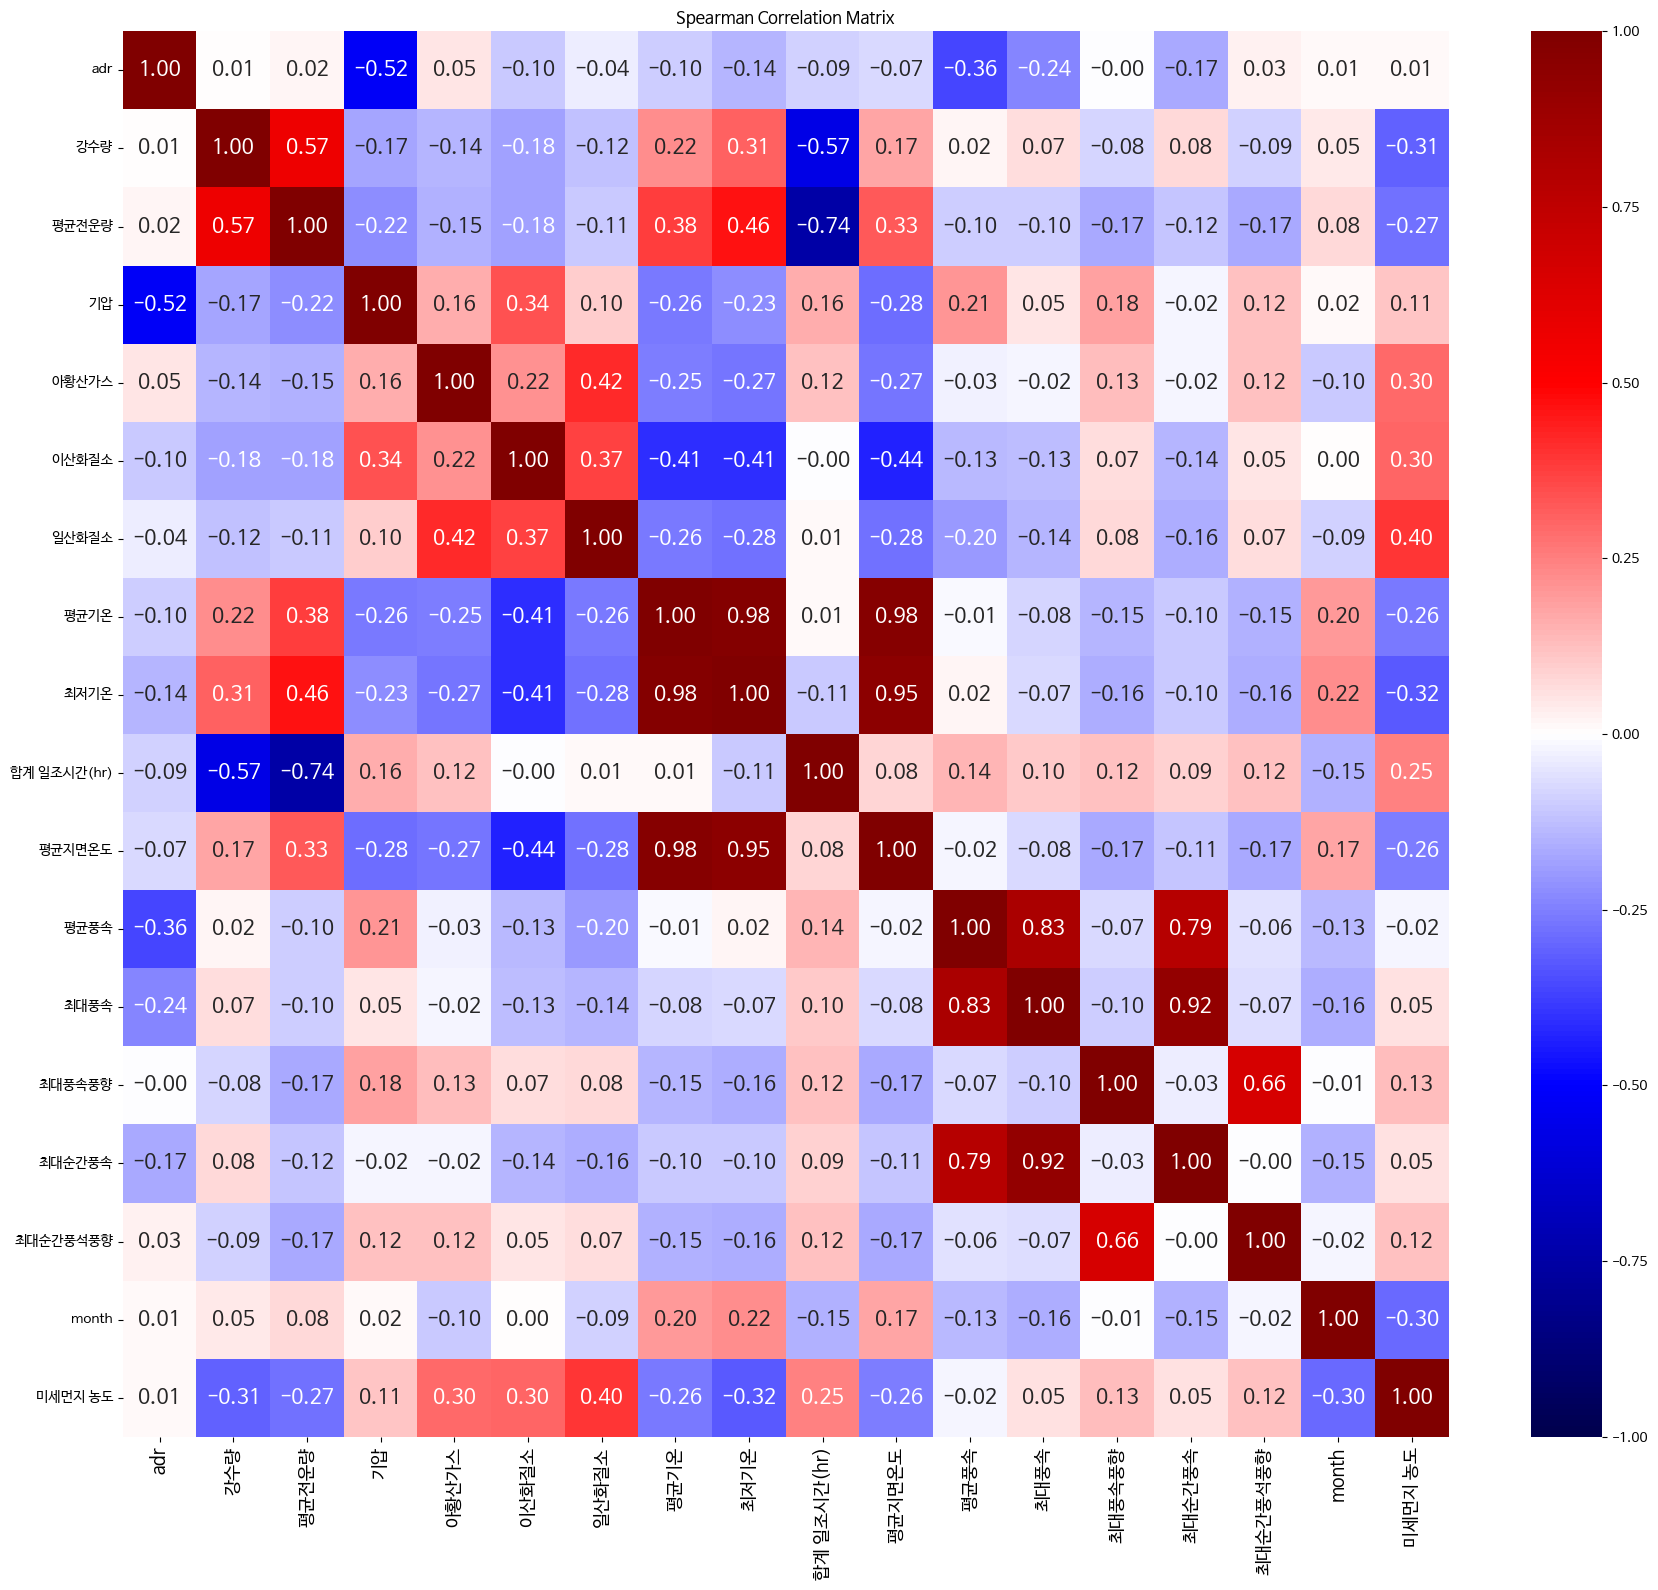

Highly Correlated Features (Spearman correlation > 0.9):
adr - adr
강수량 - 강수량
평균전운량 - 평균전운량
기압 - 기압
아황산가스 - 아황산가스
이산화질소 - 이산화질소
일산화질소 - 일산화질소
평균기온 - 평균기온
평균기온 - 최저기온
평균기온 - 평균지면온도
최저기온 - 평균기온
최저기온 - 최저기온
최저기온 - 평균지면온도
합계 일조시간(hr) - 합계 일조시간(hr)
평균지면온도 - 평균기온
평균지면온도 - 최저기온
평균지면온도 - 평균지면온도
평균풍속 - 평균풍속
최대풍속 - 최대풍속
최대풍속 - 최대순간풍속
최대풍속풍향 - 최대풍속풍향
최대순간풍속 - 최대풍속
최대순간풍속 - 최대순간풍속
최대순간풍석풍향 - 최대순간풍석풍향
month - month
미세먼지 농도 - 미세먼지 농도


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= data_cleaned[['adr', '강수량', '평균전운량', '기압', '아황산가스', '이산화질소', '일산화질소', '평균기온',
       '최저기온', '합계 일조시간(hr)', '평균지면온도', '평균풍속', '최대풍속', '최대풍속풍향', '최대순간풍속',
       '최대순간풍석풍향','month','미세먼지 농도']]

# 스피어만 상관계수를 계산한 상관행렬 구하기
correlation_matrix = df.corr(method='spearman')

# 상관 행렬 시각화 (히트맵)
plt.figure(figsize=(18, 16))
plt.xticks(fontsize=13)
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', fmt='.2f', vmin=-1, vmax=1,annot_kws={"size": 15})
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()

# 상관계수가 높은 변수들 찾아보기 (예: 절대값 0.9 이상인 상관계수)
high_correlation = correlation_matrix.abs() > 0.9
high_correlation = high_correlation.where(high_correlation == True).stack().index.tolist()

# 결과 출력
print("Highly Correlated Features (Spearman correlation > 0.9):")
for pair in high_correlation:
    print(f"{pair[0]} - {pair[1]}")
